# ECS7024P Coursework 3 - Kasey Purvor 200851709
##  Stork Numbers & Population Analysis

* Part 0 | Introduction
* Part 1 | Regression Models
    * Part 1.1 | Model 1 - Storks vs Birth Rate 
    * Part 1.2 | Model 2 - [PopDensity, GDPperCapita, Humans] vs BirthRate
    *  Part 1.3 | Comparing the Fit of the Models
* Part 2 | Estimating CI Using Bootstrap Technique
    * Part 2.1 | The Calculating the CIs
* Part 3 | Discussion 

## Part 0 | Introduction
This task analyses a dataset concerning stork populations and human birth rates in various European countries. By constructing and comparing two different regression models, the analysis will explore the relationship between these variables, using the bootstrap technique to estimate confidence intervals and evaluate model performance

The data schema is as follows:
| Variable        | Description                                            |
|-----------------|--------------------------------------------------------|
| Country         | A small selection of countries                         |
| Area            | The land area in Km2                                   |
| Storks          | The number of stork pairs                              |
| Humans          | The population, in millions of people                  |
| BirthRate       | The annual birth rate in 1000s per year                |
| GDP_per_capita  | The GDP per head (in dollars)                          |
| PopDensity      | The number of people divided by area in 1000s per Km2  |



## Part 1| Regression Models
The regression model section is to complete and compare two regression models to explain the variability of the number of births.
* Model 1: the only predictor is the number of storks.
* Model 2: the predictors do not include the number of storks. Instead, the predictors are: population size, GDP per capita, and population density.

The reasoning behind choosing these three predictors for Model 2 is as follows: larger populations tend to have more births; increasing prosperity has been associated with smaller family sizes; crowded countries may discourage large families
### Part 1.1 | Model 1 - Storks vs BirthRate

* In this section a linear regression model is fitted to the Storks and BirthRate data.
* The model is plotted along with the data and the RMSE and R^2 are calculated.
* There is more uncertainty at higher values shown by the widening CI bands around the regression line 
* **The RMSE is 312.03**
* **The R^2 is 0.38**
* The intercept is 225.0 and the coefficient for stork numbers is 0.029

c:\Users\kasey\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\kasey\AppData\Local\Temp\ipykernel_12256\1459995659.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('The intercept is %4.1f' % model_1.intercept_)


The RMSE_1 is 312.03
The R^2 is 0.38
The coefficients of the fitted model are:\n [[0.02879364]] \n\n---\n
The intercept is 225.0


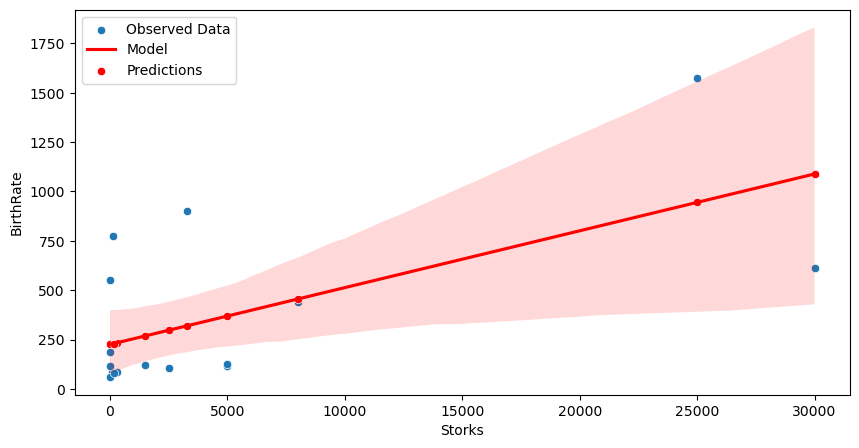

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.gridspec as gridspec
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

# read the modified_stork_data.csv into paandas 
df_storks = pd.read_csv('modified_stork_data.csv')

# fit a regresion model on the stork and birthrate data
model = LinearRegression()

# fit the model to the birthrate and stork data
x_1 = np.array(df_storks['Storks']).reshape(-1, 1)
y_1 = np.array(df_storks['BirthRate']).reshape(-1, 1)
model_1 = model.fit(x_1, y_1)

# # create the  values to plot the regression model
x_display = np.linspace(0, np.max(x_1), 100).reshape(-1, 1)
y_pred_display = model_1.predict(x_display)

# # create a plot for the data and model 
fig = plt.figure(figsize=(10, 5))

# plot the observed data
sns.scatterplot(data=df_storks, x='Storks', y='BirthRate', label='Observed Data')

# plot the model
# sns.lineplot(x=x_display.flatten(), y=y_pred_display.flatten(), color='red', label='Model')
# fig.legend()
sns.regplot(x=x_1, y=y_1, scatter=False, color='red', label='Model')

# # calculate the MSE & R^2 of the model
y_pred_1 = model_1.predict(df_storks[['Storks']])
sns.scatterplot(x=df_storks['Storks'], y=y_pred_1.flatten(), color='red', label='Predictions')
RMSE_1 = root_mean_squared_error(y_1, y_pred_1)
R2_1 = r2_score(y_1, y_pred_1)

print('The RMSE_1 is %4.2f' % RMSE_1)
print('The R^2 is %4.2f' % R2_1)
#show the coefficients of the model
print('The coefficients of the fitted model are:\\n {} \\n\\n---\\n'.format(model_1.coef_))
# show the intercept of the model 
print('The intercept is %4.1f' % model_1.intercept_)


### Part 1.2 | Model 2 - [PopDensity, GDPperCapita, Humans] vs BirthRate

* The second model looks instead at the relationship between population density, GDP per capita and the number of humans against the birthrate. 
* This will give us a comparison between the 2 models.
* The **RMSE is 189.26**
* The **R^2 is 0.77**
* The coefficients are **Intercept: 173.9, Population Density: -274.9, GDP per capita: -0.00787, Humans: 15.08**


In [30]:
# create a new model with populationsize, GDPperCapita and populationDensity as the predictors
model_2 = LinearRegression()

# Extract the predictor columns from the data 
X_2 = np.array(df_storks[['PopDensity', 'GDP_per_capita', 'Humans']])
y_2 = np.array(df_storks['BirthRate'])

# fit the model
model_2.fit(X_2, y_2)

# get the predictions
y_pred_2 = model_2.predict(X_2)

# calculate the MSE & R^2 of the model
RMSE_2 = root_mean_squared_error(y_2, y_pred_2)
R2_2 = r2_score(y_2, y_pred_2)

print('The RMSE is %4.2f' % RMSE_2)
print('The R^2 is %4.2f' % R2_2)
# print the coefficients of the model
print('The coefficients of the fitted model are:\\n {} \\n\\n---\\n'.format(model_2.coef_))
#show he intercept of the model
print('The intercept is %4.1f' % model_2.intercept_)

The RMSE is 189.26
The R^2 is 0.77
The coefficients of the fitted model are:\n [-2.74886065e+02 -7.86924935e-03  1.50837195e+01] \n\n---\n
The intercept is 173.9



### Part 1.3 | Comparing the fit of the 2 models 

For Model 1 and Model 2 we compare the RMSE and R^2 values.
* Model 1 
    * An RMSE of 312.03 indicates that, on average, the model's predictions are about 312.03 (thousand babies per year) away from the actual values.
    * An R² of 0.38 means that 38% of the variance in the dependent variable is explained by the model.
    * The coeficients are explained here
        * Coefficient: 0.02879364: The number of storks. It suggests that for every additional stork pair, the BirthRate is expected to increase by 0.02879364 units, holding all other factors constant.
        * Intercept: 225.0: This is the estimated BirthRate when the number of stork pairs is zero. This may not have a practical interpretation because it's unlikely to have zero stork pairs in the areas being studied.
* Model 2
    * An RMSE of 189.26 indicates that, on average, the model's predictions are about 189.26 (thousand babies per year) away from the actual values.
    * An R² of 0.77 means that 77% of the variance in the dependent variable is explained by the model.
    * The coefficients of the model are explained here: 
        *Intercept: 173.9: This is the estimated BirthRate when Population Density, GDP per capita, and the number of Humans are all zero. This value doesn't have a practical interpretation because it's unrealistic for these variables to be zero in a real-world scenario.

        * Population Density: -274.9: This indicates that for every unit increase in Population Density, the BirthRate is estimated to decrease by 274.9 units, holding other variables constant.

        * GDP per capita: -0.00787: This suggests that for every unit increase in GDP per capita, the BirthRate is estimated to decrease slightly by 0.00787 units, holding other variables constant.

        * Humans: 15.08: This indicates that for every unit increase in the number of Humans (in millions), the BirthRate is estimated to increase by 15.08 units, holding other variables constant.

For both of the models the following plots are created:
* **Residual Histograms** - A normal distribution of residuals indicates that the model's predictions are unbiased and that the assumptions of linear regression are met.
* **Q-Q Plots** - Comparing quantiles of the residuals to the quantiles of a standard normal distribution to check the validity of the regression model 
* **Residuals vs Predicted Values** - To check for heteroscedasticity and non-linearity 
* **Actual vs Predicted Values** - To visualize the relationship between actual and predicted values
 
***From quick visual inspection it can be see that model 2 seems to be a much better model. adhering the the normal distibution better and with much narrower CI bands. This is discussed in the discussion section.***

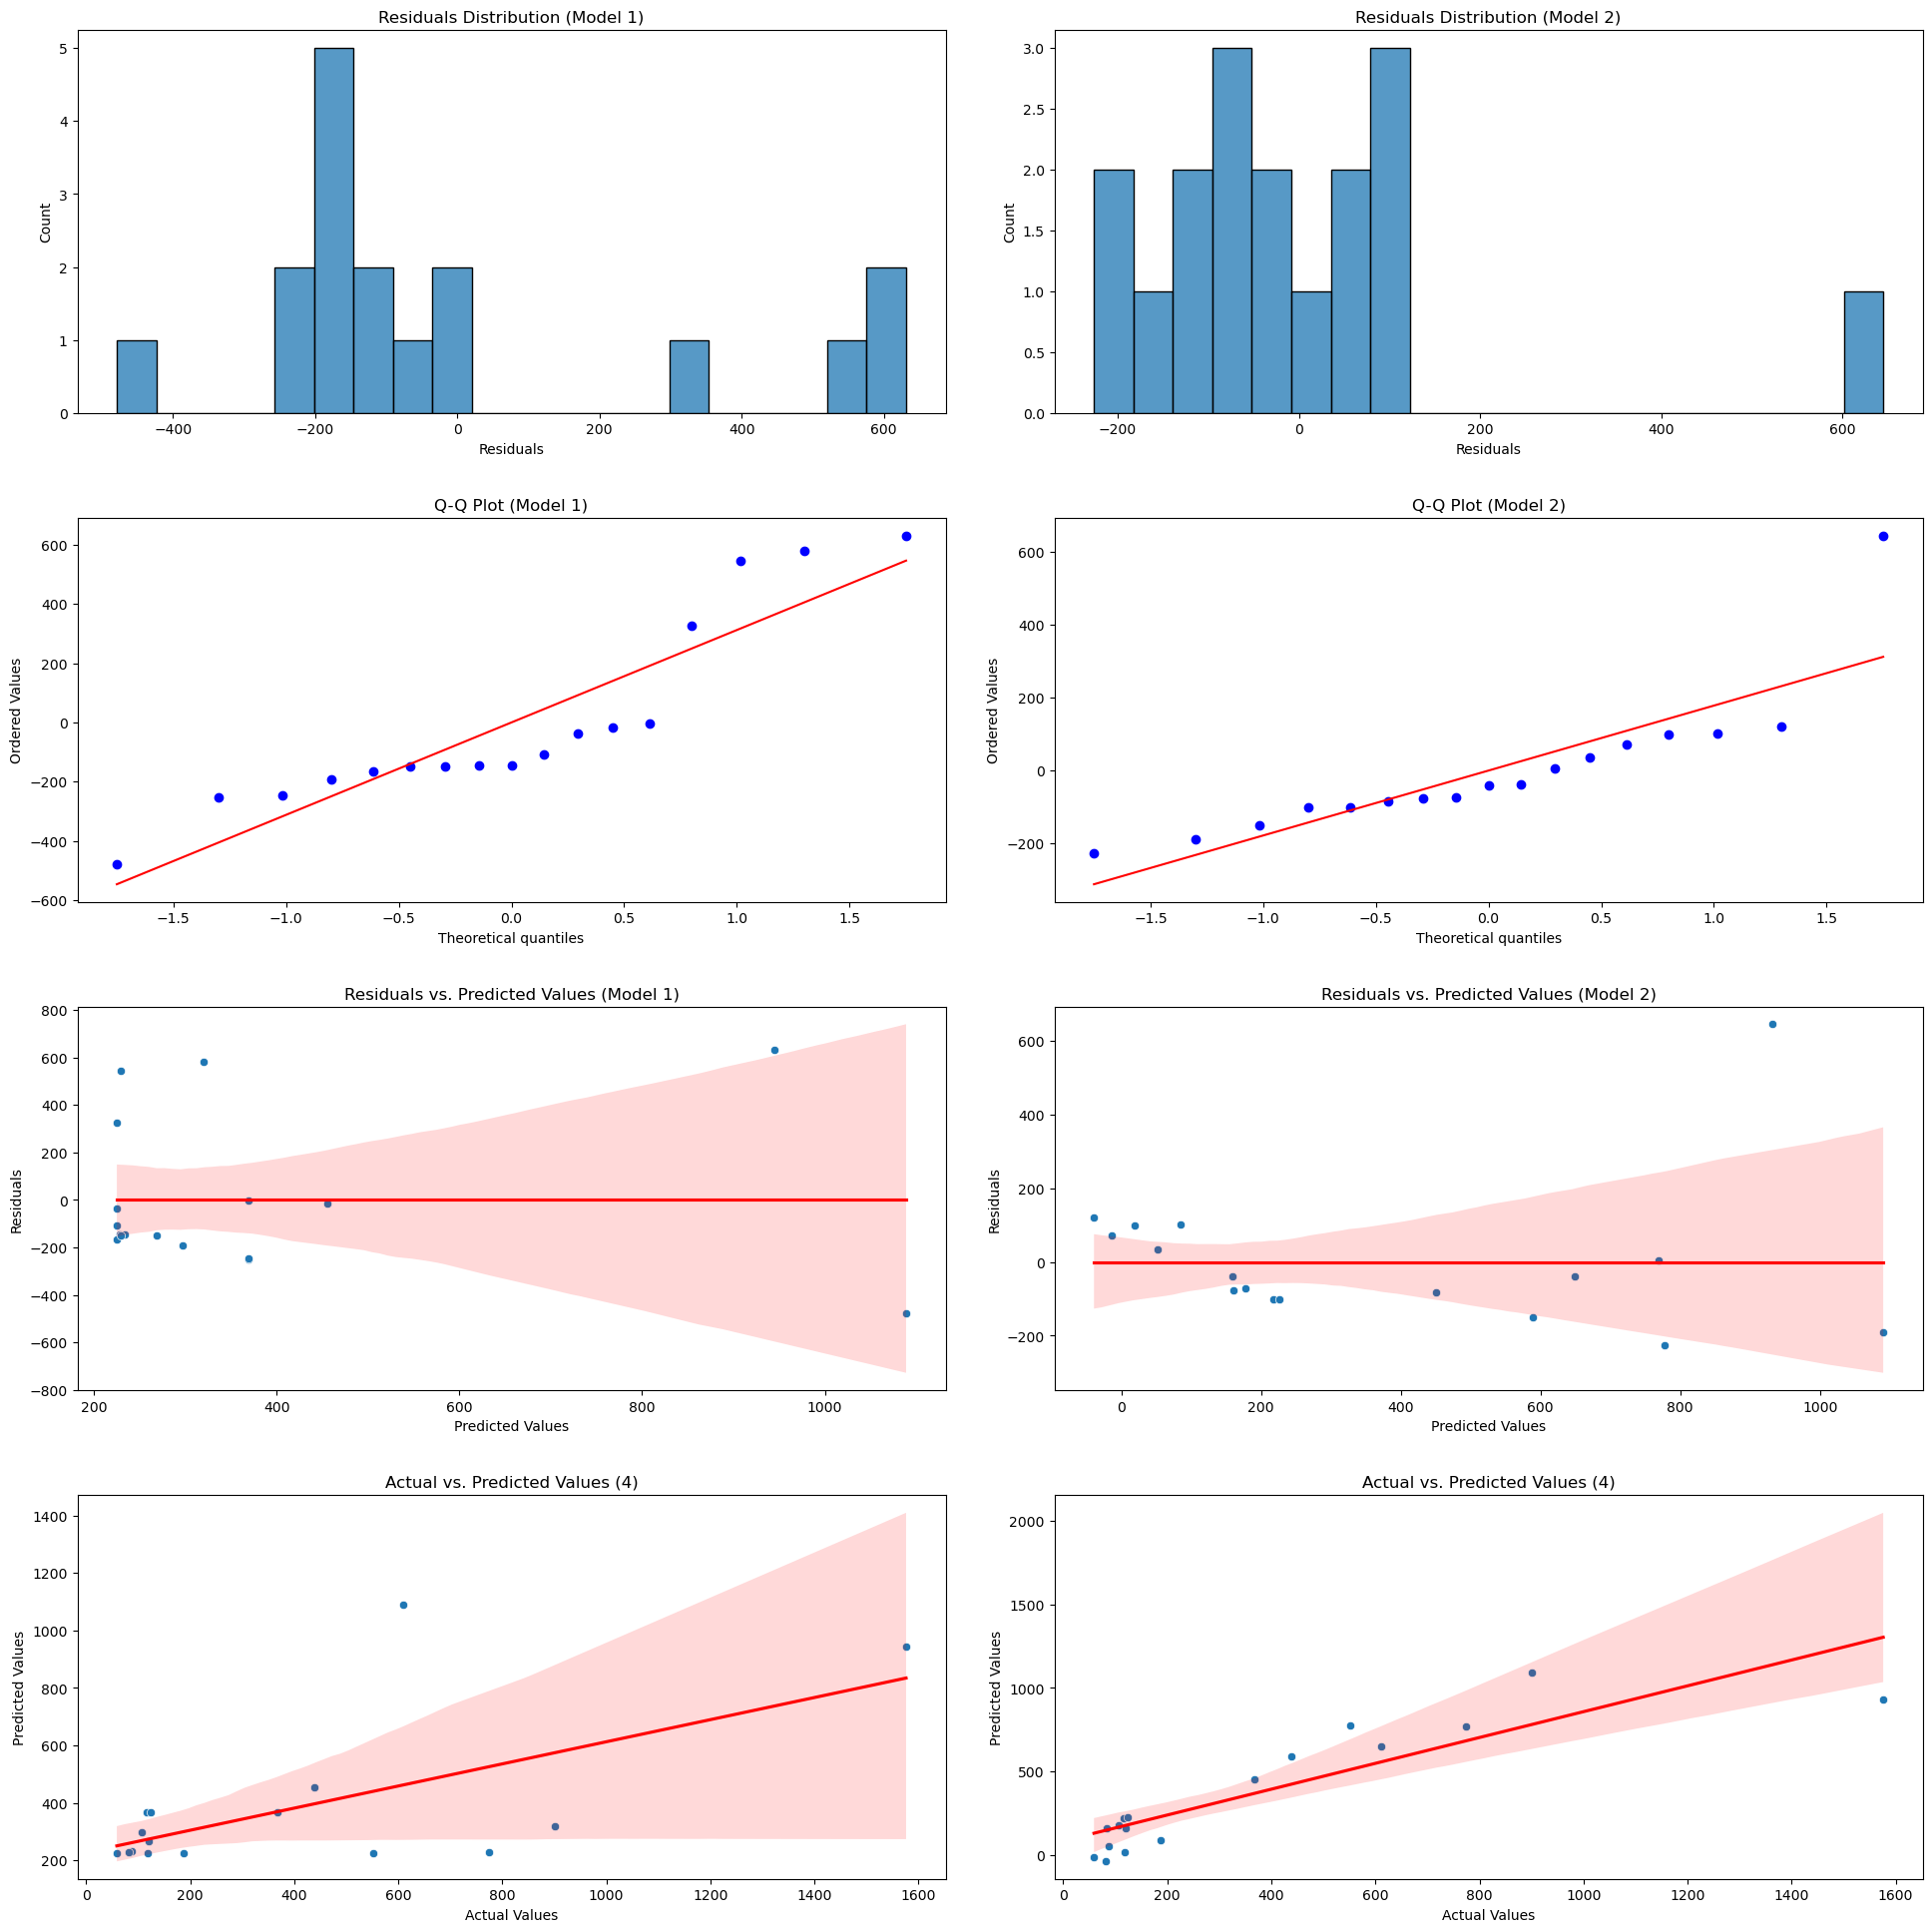

In [31]:
residuals_1 = y_1 - y_pred_1
residuals_2 = y_2 - y_pred_2

#flatten the residuals 
residuals_1 = (residuals_1).flatten()
residuals_2 = (residuals_2).flatten()

# create the objects for the subplots 
num_cols = 2
num_rows = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()
   
# residual histograms
sns.histplot(x=residuals_1, ax=axes[0], bins=20)
axes[0].set_title('Residuals Distribution (Model 1)')
axes[0].set_xlabel('Residuals')
sns.histplot(x=residuals_2, ax=axes[1], bins=20)
axes[1].set_title('Residuals Distribution (Model 2)')
axes[1].set_xlabel('Residuals')

# Q-Q plot
stats.probplot(residuals_1, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (Model 1)')
stats.probplot(residuals_2, dist="norm", plot=axes[3])
axes[3].set_title('Q-Q Plot (Model 2)')

# residuals vs predicted (residual plot)
sns.scatterplot(x=y_pred_1.flatten(), y=residuals_1, ax=axes[4])
sns.regplot(x=y_pred_1, y=residuals_1, scatter=False, color='red', ax=axes[4])
axes[4].set_title('Residuals vs. Predicted Values (Model 1)')
axes[4].set_xlabel('Predicted Values')
axes[4].set_ylabel('Residuals')
sns.scatterplot(x=y_pred_2.flatten(), y=residuals_2, ax=axes[5])
sns.regplot(x=y_pred_2, y=residuals_2, scatter=False, color='red', ax=axes[5])
axes[5].set_title('Residuals vs. Predicted Values (Model 2)')
axes[5].set_xlabel('Predicted Values')
axes[5].set_ylabel('Residuals')

#  actual vs predicted
sns.scatterplot(x=y_1.flatten(), y=y_pred_1.flatten(), ax=axes[6])
sns.regplot(x=y_1.flatten(), y=y_pred_1.flatten(), scatter=False, color='red', ax=axes[6])
axes[6].set_title('Actual vs. Predicted Values (4)')
axes[6].set_ylabel('Predicted Values')
axes[6].set_xlabel('Actual Values')
fig.tight_layout(pad=3.0)
sns.scatterplot(x=y_2.flatten(), y=y_pred_2.flatten(), ax=axes[7])
sns.regplot(x=y_2.flatten(), y=y_pred_2.flatten(), scatter=False, color='red', ax=axes[7])
axes[7].set_title('Actual vs. Predicted Values (4)')
axes[7].set_ylabel('Predicted Values')
axes[7].set_xlabel('Actual Values')

fig.tight_layout(pad=3.0)

## Part 2 | Estimating CIs using the Bootstrap Technique for RMSE

In this secion we use the bootstrap technique to estimate confidence intervals for the RMSE of the 2 models.

### Part 2.1 | Calculating the CIs

* The bootstrap technique is performed 10000 times, and each time a linear regression model is fit to a bootstrap sample of the data. 
* The RMSE of each model is then calculated and the 2.5th and 97.5th percentiles of the RMSE values are calculated.
* The difference bewteen the models RMSE values is calculated and plotted also. 

| Confidence Interval | RMSE_1 CI                     | RMSE_2 CI                     | RMSE Difference CI               |
|---------------------|-------------------------------|-------------------------------|----------------------------------|
| 95% CI Interval     | [127.8625, 375.4790]          | [26.4949, 245.9600]           | [-23.60799142, 261.97514944]     |
| 99% CI Interval     | [74.9765, 397.4603]           | [14.6044, 262.5114]           | [-71.67392887, 285.43620199]     |




The distribution of the  values are plotted for the 2 models and the difference  below. 

***Of note was that model 2 shows 2 peaks which is discussed in Part 1.3***


95% CI Interval
The RMSE_1 CI is  [123.27212745 353.15207253]
The RMSE_2 CI is  [ 19.09165705 239.74000758]
The RMSE difference CI is  [-16.23736295 246.79931106]
95% CI Interval
The RMSE_1 CI is  [ 85.86350812 383.23268445]
The RMSE_2 CI is  [ 15.643242   254.31851065]
The RMSE difference CI is  [-69.95265933 255.02065652]


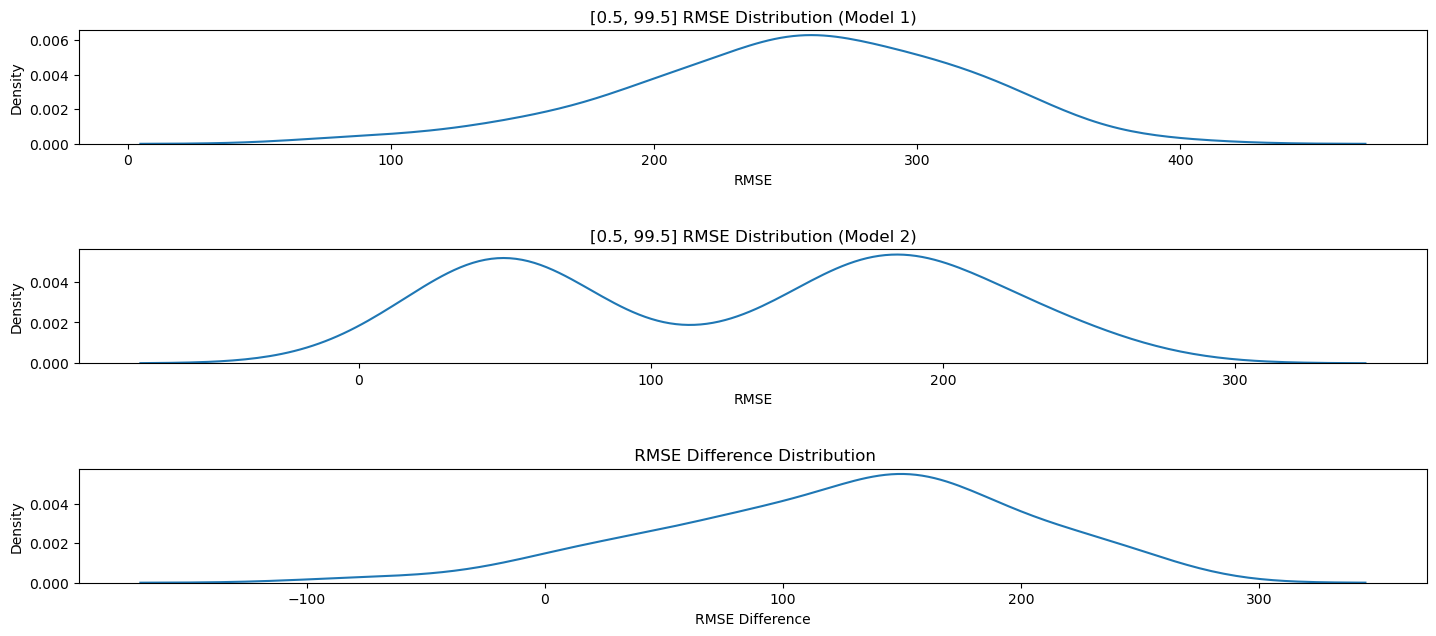

In [32]:
from sklearn.utils import resample

# function to fit model and return the RMSE 
def fit_model_return_RMSE(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    RMSE = root_mean_squared_error(y, y_pred)

    return RMSE

# funciton to create a bootstrap sample and return it 
def bootstrap_sample(df):
    return resample(df)

# perform a loop and get the RMSE value for each bootstrap sample
N_loops = 100
RMSE_1_store = []
RMSE_2_store = []
RMSE_diff = []
for i in range(N_loops):
    bootstrap_df = bootstrap_sample(df_storks)
    RMSE_1 = (fit_model_return_RMSE(bootstrap_df[['Storks']], bootstrap_df['BirthRate']))
    RMSE_2 = (fit_model_return_RMSE(bootstrap_df[['PopDensity', 'GDP_per_capita', 'Humans']], bootstrap_df['BirthRate']))
    RMSE_1_store.append(RMSE_1)
    RMSE_2_store.append(RMSE_2)
    RMSE_diff.append( RMSE_1 - RMSE_2)
    
#crearte the subplots 
fig, axes = plt.subplots(3, 1, figsize=(15, 7))
axes = axes.flatten()
plot_tracker = 0

# loop through 
for ci  in [[2.5, 97.5], [0.5, 99.5]]:
    # find the CI of the RMSE values
    RMSE_1_CI = np.percentile(np.sort(RMSE_1_store), ci)
    RMSE_2_CI = np.percentile(np.sort(RMSE_2_store), ci)
    RMSE_diff_CI = np.percentile(np.sort(RMSE_diff), ci)
    
    if plot_tracker < 2: print('95% CI Interval') 
    else: print('99% CI Interval')
    print('The RMSE_1 CI is ' , RMSE_1_CI)
    print('The RMSE_2 CI is ' , RMSE_2_CI)
    print('The RMSE difference CI is ' , RMSE_diff_CI)

# plot model 1 RMSE distribution
sns.kdeplot(RMSE_1_store, ax=axes[plot_tracker])
axes[plot_tracker].set_title(f'{ci} RMSE Distribution (Model 1)')
axes[plot_tracker].set_xlabel('RMSE')

plot_tracker += 1

# plot model 2 RMSE distribution
sns.kdeplot(RMSE_2_store, ax=axes[plot_tracker])
axes[plot_tracker].set_title(f'{ci} RMSE Distribution (Model 2)')
axes[plot_tracker].set_xlabel('RMSE')

plot_tracker += 1

# plot the RMSE difference distribution
sns.kdeplot(RMSE_diff, ax=axes[plot_tracker])
axes[plot_tracker].set_title(f' RMSE Difference Distribution')
axes[plot_tracker].set_xlabel('RMSE Difference')

fig.tight_layout(pad=3.0)

### Part 1.3 | Discussion

Both regression models aim to explain the variability in the number of births. Model 1 uses the number of storks as the sole predictor, as in the original paper. Model 2 includes more plausible predictors: population size, GDP per capita, and population density.

The evaluation of these models relies on several metrics and diagnostic plots.  

**Model Fit and Predictive Accuracy**

* **R-squared:** Model 2 demonstrates a substantially higher R² value (0.77) compared to Model 1 (0.38). This indicates that Model 2 explains 77% of the variance in birth rates, significantly more than the 38% explained by Model 1. This suggests that population size, GDP per capita, and population density are better predictors of birth rates than the number of storks.

* **RMSE:** Model 2 also shows a lower RMSE (189.26 thousand babies per year) compared to Model 1 (312.03 thousand babies per year). This means that, on average, the predictions from Model 2 are closer to the actual birth rate values than the predictions from Model 1.

**Confidence Intervals and Bootstrap Analysis**

The bootstrap technique was employed to estimate confidence intervals for the RMSE values of both models. This technique involves creating multiple resampled datasets from the original data by sampling with replacement. Each resampled data set is then used to find the distribution of a chosen statistic. In this case the statistic is RMSE and the difference bewteen them. A regression model is fit onto each new dataset, resulting in a distribution of RMSE values. From this distribution, confidence intervals can be calculated. The 95% CI provides more precision with a narrower range but at the expense of slightly lower confidence. The 99% CI, while providing less precision with a wider range, offers greater confidence in capturing the true RMSE value.


| Confidence Interval | RMSE_1 CI                     | RMSE_2 CI                     | RMSE Difference CI               |
|---------------------|-------------------------------|-------------------------------|----------------------------------|
| 95% CI Interval     | [127.8625, 375.4790]          | [26.4949, 245.9600]           | [-23.60799142, 261.97514944]     |
| 99% CI Interval     | [74.9765, 397.4603]           | [14.6044, 262.5114]           | [-71.67392887, 285.43620199]     |

 **RMSE difference:**

Key Observations:


* Both the 95% and 99% CIs for the RMSE difference include zero. This means we cannot confidently conclude that there is a statistically significant difference between the RMSE values of the two models at these confidence levels.

* The CIs are quite wide, indicating a substantial degree of uncertainty in the estimated difference between the RMSE values.
Possible Explanations and Further Steps:

* The overlap of zero in the CIs might be due to the limited sample size used in the study. A larger sample size could potentially lead to narrower CIs and a more definitive conclusion about the difference in model performance.

* The wide CIs could also suggest high variability in the data, making it challenging to precisely estimate the difference in RMSE values. Further investigation into the data's characteristics and potential subgroups, as hinted at in the source, might provide valuable insights.

**Individual RMSE CIs**

Both models consistently show that Model 2 has a narrower confidence interval compared to Model 1 at both confidence levels. This reinforces the conclusion that Model 2 is a more reliable predictor. The difference in interval width highlights the stability and robustness of Model 2's predictions across different confidence levels. Despite having a bimodal RMSE distribution, it exhibits a narrower confidence interval at a lower range than Model 1. This reinforces the conclusion that Model 2 is a more reliable and accurate predictor. The two peaks observed in the RMSE distribution of Model 2 could indicate the presence of subgroups within the data that are being modeled differently. Further investigation of these subgroups might reveal additional insights.

**Residual Analysis**

The analysis of residual plots is crucial for evaluating the validity of regression models.

* **Normality:**  The residuals histograms for both models exhibit sparse and non-normal distributions. This deviation from normality could suggest the presence of outliers or non-linear relationships not captured by the models. However, the Q-Q plot indicates that Model 2's residuals are closer to a normal distribution compared to Model 1, implying a better fit.

* **Homoscedasticity:** The residuals vs. predicted plots for both models reveal soem degree heteroscedasticity, but with a wider CI in residuals at higher predicted values, as shown by the widening of the CI bands around the regression line for these graphs. However, this issue is less pronounced in Model 2, where the CI width at peak values is nearly half that of Model 1. This suggests that Model 2 does a better job at modeling the relationship between predictors and birth rates across the range of predicted values.

* **Actual vs. Predicted:** The actual vs. predicted plots mirror the trends observed in the residuals vs. predicted plots. Model 2 exhibits a narrower CI at higher values, further supporting its superior fit.

**Causation vs. Correlation**

While the statistical analysis clearly favors Model 2, it's essential to remember that correlation does not equate to causation. Although Model 2 identifies a strong relationship between population size, GDP per capita, population density, and birth rates, it does not necessarily imply that these factors directly cause changes in birth rates. Other confounding variables not included in the model may contribute to the observed relationship.

**Importance of Critical Evaluation**

The original paper, which found a statistically significant correlation between stork populations and birth rates, serves as a crucial reminder of the importance of critically evaluating statistical results. The "storks deliver babies" example  highlights the dangers of mistaking correlation for causation and emphasizes the need for carefully considering alternative explanations and potential confounding factors. 
